# House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.array([95,85,80,70,60])
y=np.array([85,95,70,65,70])

In [3]:
model= np.polyfit(x, y, 1)
model

array([ 0.64383562, 26.78082192])

In [4]:
predict = np.poly1d(model)
predict(65)

68.63013698630135

In [5]:
y_pred= predict(x)
y_pred


array([87.94520548, 81.50684932, 78.28767123, 71.84931507, 65.4109589 ])

In [6]:
from sklearn.metrics import r2_score # use model fit 

In [7]:
r2_score(y, y_pred)

0.4803218090889324

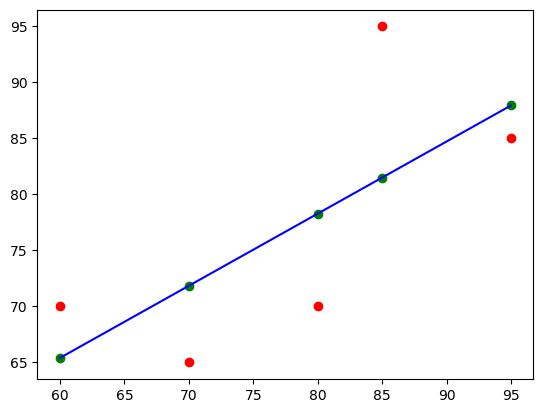

In [8]:
y_line = model[1] + model[0] * x
plt.plot(x, y_line, c='blue')  
plt.scatter(x, y_pred, c='green')  
plt.scatter(x, y, c='red')  
plt.show()


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
california = fetch_california_housing()

# Access the feature data
X = california.data

# Access the target data (median house values)
y = california.target


In [11]:
data = pd.DataFrame(california.data)

In [12]:
data.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
data.columns

RangeIndex(start=0, stop=8, step=1)

In [14]:
data['PRICE'] = california.target


In [15]:
data.isnull().sum()


0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
PRICE    0
dtype: int64

In [16]:
 x = data.drop(['PRICE'], axis = 1)
 y = data['PRICE']   

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(x, y, test_size = 0.2,random_state = 0)

In [18]:
import sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model=lm.fit(xtrain, ytrain)

In [19]:
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)

In [20]:
df=pd.DataFrame(ytrain_pred,ytrain)
df=pd.DataFrame(ytest_pred,ytest)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, ytest_pred)
print(mse)
mse = mean_squared_error(ytrain_pred,ytrain)
print(mse)


0.5289841670367225
0.5234413607125447


In [22]:
mse = mean_squared_error(ytest, ytest_pred)
print(mse)


0.5289841670367225


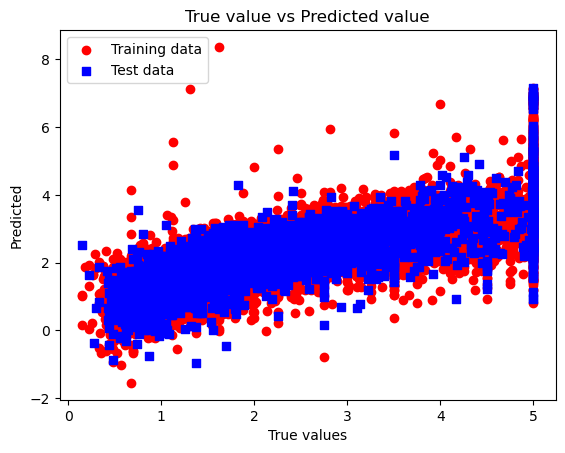

In [23]:
plt.scatter(ytrain, ytrain_pred, c='red', marker='o', label='Training data')
plt.scatter(ytest, ytest_pred, c='blue', marker='s', label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc='upper left')

plt.plot()
plt.show()
